In [1]:
# Data Cleaning, Data Exploration and assigning 0 and 1 to different values of 'income'
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('https://raw.githubusercontent.com/nickkatsy/python_ml_ect_/master/income.csv')

df.isna().sum()
df.describe()
df.info()

df['income'].describe()

df['income'] = [1 if X == '>50K' else 0 for X in df['income']]

df.columns = df.columns.str.replace('.','_')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


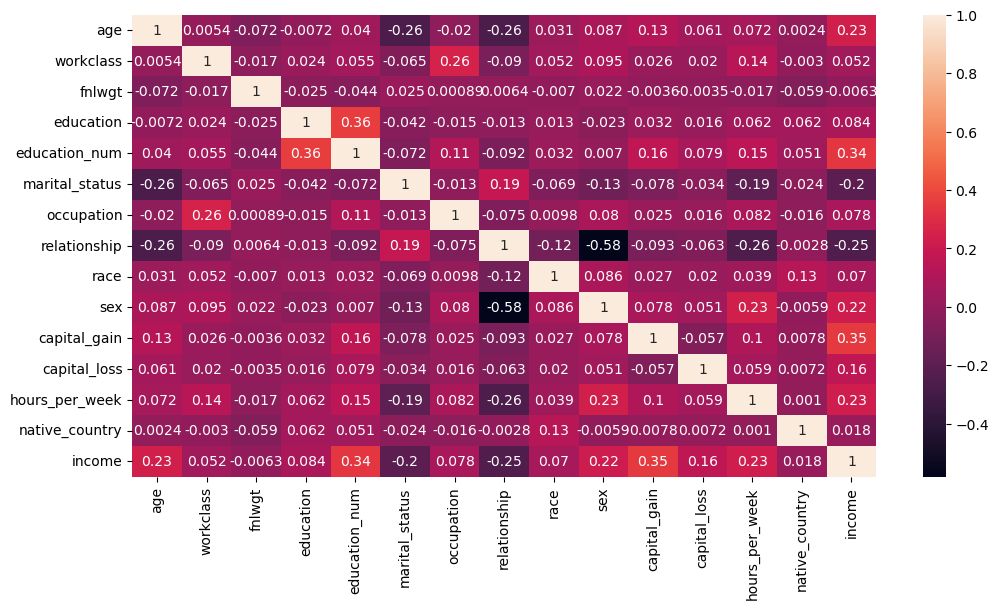

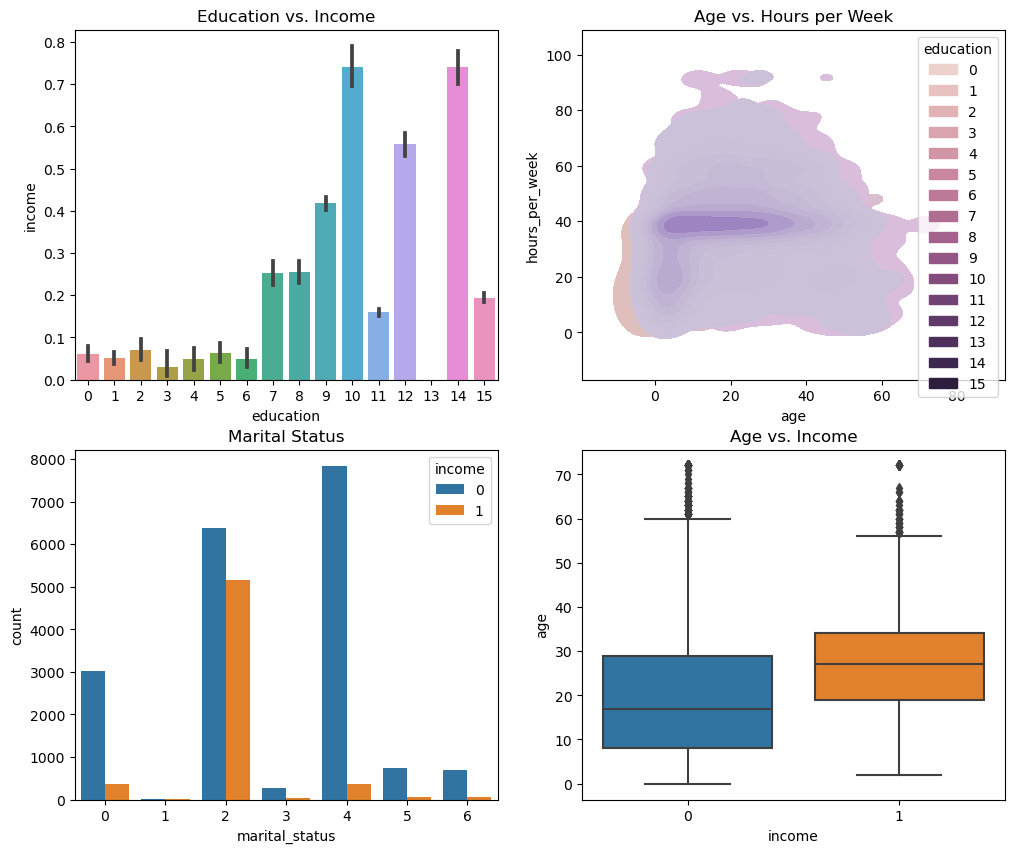

In [2]:
# Creating a copy of the dataset for visualization
df1 = df.copy()

#Label encoding categorical variables for visualization
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df1:
    df1[i] = le.fit_transform(df1[i])

    
# Creating a heatmap to visualize correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(), annot=True)

# Subplots function for specific subplots for specific visualizations 
def subplots(df1):
    plt_, axs = plt.subplots(2, 2, figsize=(12,10))

    sns.barplot(x='education', y='income',data=df1,ax=axs[0,0])
    axs[0,0].set_title('Education vs. Income')

    sns.kdeplot(x='age',y='hours_per_week',hue='education',data=df1,fill=True,ax=axs[0,1])
    axs[0,1].set_title('Age vs. Hours per Week')

    sns.countplot(x='marital_status', hue='income',data=df1,ax=axs[1,0])
    axs[1,0].set_title('Marital Status')

    sns.boxplot(x='income',y='age',data=df1,ax=axs[1,1])
    axs[1,1].set_title('Age vs. Income')

    plt.show()

subplots(df1)

In [3]:
#Importing the statsmodels library for OLS regression
import statsmodels.api as sm

model_ = sm.OLS(exog=df1.drop('income',axis=1),endog=(df1['income'])).fit()
print(model_.summary())

                                 OLS Regression Results                                
Dep. Variable:                 income   R-squared (uncentered):                   0.467
Model:                            OLS   Adj. R-squared (uncentered):              0.467
Method:                 Least Squares   F-statistic:                              1563.
Date:                Sun, 24 Dec 2023   Prob (F-statistic):                        0.00
Time:                        17:24:32   Log-Likelihood:                         -9866.1
No. Observations:               25000   AIC:                                  1.976e+04
Df Residuals:                   24986   BIC:                                  1.987e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [4]:
#Separating Features and Target


X = df.drop('income',axis=1)
y = df['income']

# train/test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)

#onehotencoder for categorical features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

#standardscaler for numeric features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# columntransformer to make a pipeline
from sklearn.compose import make_column_transformer


ct = make_column_transformer(
    (ohe,X.select_dtypes(include='object').columns),
    (sc,X.select_dtypes(include=['int64','float64']).columns),remainder='passthrough')

ct.fit_transform(X)

array([[ 0.        ,  0.        ,  0.        , ..., 13.50972664,
        -0.21719211,  2.40117761],
       [ 0.        ,  0.        ,  0.        , ..., -0.14793361,
        -0.21719211, -0.03597233],
       [ 0.        ,  0.        ,  0.        , ..., -0.14793361,
        -0.21719211, -0.03597233],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.14793361,
        -0.21719211, -0.03597233],
       [ 0.        ,  0.        ,  0.        , ..., -0.14793361,
        -0.21719211, -0.03597233],
       [ 0.        ,  0.        ,  0.        , ..., -0.14793361,
        -0.21719211, -0.03597233]])

In [5]:
#Pipelines for various classification models including Logistic Regression,
# Random Forest, Gradient Boosting, Decision Tree, Naive Bayes, Linear Discriminant Analysis,
# and K-Nearest Neighbors.

from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()


from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

rfc = RandomForestClassifier()

gbc = GradientBoostingClassifier()

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)


from sklearn.pipeline import make_pipeline

lr_pipe = make_pipeline(ct,clf_lr).fit(X_train,y_train)
lr_pred = lr_pipe.predict(X_test)
lr_pred_prob = lr_pipe.predict_proba(X_test)[::,1]


rfc_pipe = make_pipeline(ct,rfc).fit(X_train,y_train)
rfc_pred = rfc_pipe.predict(X_test)
rfc_pred_prob = rfc_pipe.predict_proba(X_test)[::,1]


gbc_pipe = make_pipeline(ct,gbc).fit(X_train,y_train)
gbc_pred = gbc_pipe.predict(X_test)
gbc_pred_prob = gbc_pipe.predict_proba(X_test)[::,1]


nb_pipe = make_pipeline(ct,nb).fit(X_train,y_train)
nb_pred = nb_pipe.predict(X_test)
nb_pred_prob = nb_pipe.predict_proba(X_test)[::,1]

knn_pipe = make_pipeline(ct,knn).fit(X_train,y_train)
knn_pred = knn_pipe.predict(X_test)
knn_pred_prob = knn_pipe.predict_proba(X_test)[::,1]

tree_pipe = make_pipeline(ct,tree).fit(X_train,y_train)
tree_pred = tree_pipe.predict(X_test)
tree_pred_prob = tree_pipe.predict_proba(X_test)[::,1]

lda_pipe = make_pipeline(ct,lda).fit(X_train,y_train)
lda_pred = lda_pipe.predict(X_test)
lda_pred_prob = lda_pipe.predict_proba(X_test)[::,1]

In [6]:
# Scoring all models: Accuracy, ROC_AUCScore,F1 score, confusion matrix ect

from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,f1_score,confusion_matrix

def evaluate_model(y_test,y_pred,y_pred_prob,model_name):
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred_prob)
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{model_name} -Accuracy- {acc*100:.2f}%, -ROC_AUC- {roc*100:.2f}%, -F1 Score- {f1*100:.2f}%')
    print('Confusion Matrix:')
    print(cm)



evaluate_model(y_test, lr_pred, lr_pred_prob,'Logistic Regression')
evaluate_model(y_test, rfc_pred, rfc_pred_prob, 'Random Forest')
evaluate_model(y_test, tree_pred, tree_pred_prob, 'Decision Tree')
evaluate_model(y_test, lda_pred, lda_pred_prob, 'LDA')
evaluate_model(y_test, knn_pred, knn_pred_prob, 'K-Nearest Neighbors')
evaluate_model(y_test, nb_pred, nb_pred_prob, 'Naive Bayes')
evaluate_model(y_test, gbc_pred, gbc_pred_prob, 'Gradient Boost')

Logistic Regression -Accuracy- 84.66%, -ROC_AUC- 90.69%, -F1 Score- 66.23%
Confusion Matrix:
[[3481  274]
 [ 493  752]]
Random Forest -Accuracy- 85.06%, -ROC_AUC- 89.84%, -F1 Score- 67.59%
Confusion Matrix:
[[3474  281]
 [ 466  779]]
Decision Tree -Accuracy- 80.40%, -ROC_AUC- 74.90%, -F1 Score- 61.90%
Confusion Matrix:
[[3224  531]
 [ 449  796]]
LDA -Accuracy- 83.48%, -ROC_AUC- 89.46%, -F1 Score- 62.73%
Confusion Matrix:
[[3479  276]
 [ 550  695]]
K-Nearest Neighbors -Accuracy- 82.60%, -ROC_AUC- 86.41%, -F1 Score- 63.23%
Confusion Matrix:
[[3382  373]
 [ 497  748]]
Naive Bayes -Accuracy- 50.20%, -ROC_AUC- 71.99%, -F1 Score- 49.29%
Confusion Matrix:
[[1300 2455]
 [  35 1210]]
Gradient Boost -Accuracy- 86.50%, -ROC_AUC- 92.08%, -F1 Score- 69.85%
Confusion Matrix:
[[3543  212]
 [ 463  782]]


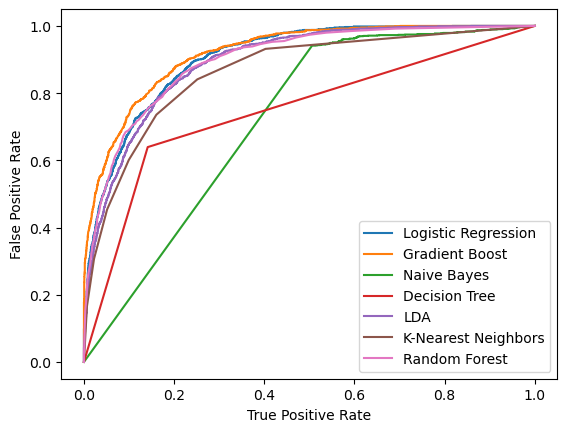

In [7]:
# ROC Curves for all models

def ROC(y_test,y_pred_prob,model_name):
    fpr,tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr,tpr,label=model_name)
    plt.xlabel('True Positive Rate')
    plt.ylabel('False Positive Rate')
    


ROC(y_test, lr_pred_prob, 'Logistic Regression')
ROC(y_test, gbc_pred_prob, 'Gradient Boost')
ROC(y_test,nb_pred_prob,'Naive Bayes')
ROC(y_test,tree_pred_prob,'Decision Tree')
ROC(y_test,lda_pred_prob,'LDA')
ROC(y_test, knn_pred_prob, 'K-Nearest Neighbors')
ROC(y_test, rfc_pred_prob, 'Random Forest')
plt.legend()
plt.show()
